In [154]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
schlev_2010 = pd.read_csv('./data_sets/us_census/elsec10.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2011 = pd.read_csv('./data_sets/us_census/elsec11.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2012 = pd.read_csv('./data_sets/us_census/elsec12.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2013 = pd.read_csv('./data_sets/us_census/elsec13.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2014 = pd.read_csv('./data_sets/us_census/elsec14.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2015 = pd.read_csv('./data_sets/us_census/elsec15.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2016 = pd.read_csv('./data_sets/us_census/elsec16.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2017 = pd.read_csv('./data_sets/us_census/elsec17.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
schlev_2018 = pd.read_csv('./data_sets/us_census/elsec18.txt', usecols=['STATE', 'NAME', 'SCHLEV', 'YRDATA'], dtype={'STATE': 'str', 'NAME': 'str', 'SCHLEV': 'str', 'YRDATA': 'int'}, index_col=False, na_values='N', na_filter=False)
states = {}
with open('./data_sets/us_census/states_map.json') as f:
    states = json.load(f)
schlev_and_state = pd.concat([schlev_2010, schlev_2011, schlev_2012, schlev_2013, schlev_2014, schlev_2015, schlev_2016, schlev_2017, schlev_2018])
schlev_and_state['STATE'] = schlev_and_state['STATE'].map(lambda x: states[x])

In [156]:
schl_data_2010 = pd.read_csv('./data_sets/us_census/elsec10t.txt', index_col=False)
schl_data_2011 = pd.read_csv('./data_sets/us_census/elsec11t.txt', index_col=False)
schl_data_2012 = pd.read_csv('./data_sets/us_census/elsec12t.txt', index_col=False)
schl_data_2013 = pd.read_csv('./data_sets/us_census/elsec13t.txt', index_col=False)
schl_data_2014 = pd.read_csv('./data_sets/us_census/elsec14t.txt', index_col=False)
schl_data_2015 = pd.read_csv('./data_sets/us_census/elsec15t.txt', index_col=False)
schl_data_2016 = pd.read_csv('./data_sets/us_census/elsec16t.txt', index_col=False)
schl_data_2017 = pd.read_csv('./data_sets/us_census/elsec17t.txt', index_col=False)
schl_data_2018 = pd.read_csv('./data_sets/us_census/elsec18t.txt', index_col=False)
schl_data_2010['YRDATA'] = 10
schl_data_2011['YRDATA'] = 11
schl_data_2012['YRDATA'] = 12
schl_data_2013['YRDATA'] = 13
schl_data_2014['YRDATA'] = 14
schl_data_2015['YRDATA'] = 15
schl_data_2016['YRDATA'] = 16
schl_data_2017['YRDATA'] = 17
schl_data_2018['YRDATA'] = 18
column_names = {}
with open('./data_sets/us_census/column_map.json') as f:
    column_names = json.load(f)
regions = {}
with open('./data_sets/us_census/regions_map.json') as f2:
    regions = json.load(f2)

In [157]:
def map_divisions(state):
    for division, states in regions["divisions"].items():
        if state in states:
            return division
def map_regions(division):
    for region, divisions in regions["regions"].items():
        if division in divisions:
            return region
schlev_data = pd.concat([schl_data_2010, schl_data_2011, schl_data_2012, schl_data_2013, schl_data_2014, schl_data_2015, schl_data_2016, schl_data_2017, schl_data_2018])
schlev_data = pd.merge(schlev_and_state,
                       schlev_data,
                       on=['NAME', 'YRDATA'])
schlev_data = schlev_data[schlev_data['SCHLEV'] == '03']
schlev_data.drop(columns=['SCHLEV', 'IDCENSUS', 'CONUM', 'CSA', 'CBSA', 'NCESID', 'ENROLL'], inplace=True)
schlev_data['DIVISION'] = schlev_data['STATE'].map(map_divisions)
schlev_data['REGION'] = schlev_data['DIVISION'].map(map_regions)
weird_ME_outliers = schlev_data[schlev_data['PPCSTOT'] < 0].index
schlev_data.drop(index=weird_ME_outliers, inplace=True)
schlev_data.head()

,STATE,NAME,YRDATA,TOTALREV,TFEDREV,FEDRCOMP,FEDRSPEC,FEDRNUTR,FEDROTHR,TSTREV,...,PPITOTAL,PPISALWG,PPIEMBEN,PPSTOTAL,PPSPUPIL,PPSSTAFF,PPSGENAD,PPSSCHAD,DIVISION,REGION
0,AL,AUTAUGA COUNTY SCHOOL DISTRICT,10,75102,10038,1850,2857,2289,3042,47735,...,4508.0,2964.0,1190,2333.0,322,259,149,475,East South Central,South
1,AL,BALDWIN COUNTY SCHOOL DISTRICT,10,260945,30989,8795,7272,6023,8899,107281,...,4898.0,3214.0,1251,2972.0,486,419,127,589,East South Central,South
2,AL,BARBOUR COUNTY SCHOOL DISTRICT,10,11335,3158,1350,513,666,629,6269,...,5203.0,3442.0,1361,3719.0,611,352,494,617,East South Central,South
3,AL,EUFAULA CITY SCHOOL DISTRICT,10,26377,4416,1209,990,1075,1142,15624,...,5300.0,3363.0,1364,2725.0,490,277,404,569,East South Central,South
4,AL,BIBB COUNTY SCHOOL DISTRICT,10,33635,5572,1457,1394,1329,1392,20227,...,4709.0,3222.0,1299,2930.0,466,455,278,489,East South Central,South


In [158]:
metadata = pd.read_csv('./data_sets/us_census/mean_household_income/2010_metadata.csv')
column_names = {}
for i in metadata.index:
    row = metadata.iloc[i]
    if row['id'] == 'Mean income (dollars)!!Estimate!!All households':
        column_names[row['GEO_ID']] = 'MEAN INCOME'
    elif row['GEO_ID'] != 'NAME' and row['id'] != 'Mean income (dollars)!!Estimate!!All households' and row['id'] != 'MEAN INCOME':
        column_names[row['GEO_ID']] = row['id']
parent_dir = './data_sets/us_census/mean_household_income/'
tables = [pd.read_csv(f'{parent_dir}2010_data.csv'), pd.read_csv(f'{parent_dir}2011_data.csv'), pd.read_csv(f'{parent_dir}2012_data.csv'), pd.read_csv(f'{parent_dir}2013_data.csv'), pd.read_csv(f'{parent_dir}2014_data.csv'), pd.read_csv(f'{parent_dir}2015_data.csv'), pd.read_csv(f'{parent_dir}2016_data.csv'), pd.read_csv(f'{parent_dir}2017_data.csv'), pd.read_csv(f'{parent_dir}2018_data.csv')]
for i in range(len(tables)):
    table = tables[i]
    table.rename(columns=column_names, inplace=True)
    indices_to_drop = table[table['NAME'].str.contains('Puerto Rico')].index.values
    table.drop(index=indices_to_drop, inplace=True)
    table.drop(index=0, inplace=True)
    table = table.loc[:, ('NAME', 'MEAN INCOME')]
    rplc_str = ' (Bandera, Bexar, and Medina Counties);'
    table['NAME'] = table['NAME'].transform(lambda x: x.replace(rplc_str, ',') if (rplc_str in x) else x)
    table.loc[table['NAME'].str.contains(rplc_str, regex=False)] = table.loc[table['NAME'].str.contains(rplc_str, regex=False)].transform(lambda x: x['NAME'].replace(rplc_str, ','), axis=1)
    table['STATE'] = table['NAME'].transform(lambda x: states[x.split(', ')[1]])
    table['NAME'] = table['NAME'].transform(lambda x: x.split(', ')[0].upper())
    table['YRDATA'] = 10 + i
    table['MEAN INCOME'] = table['MEAN INCOME'].astype(int)
    tables[i] = table
mean_income = pd.concat(tables)
schlev_data = pd.merge(schlev_data,
                       mean_income,
                       on=['NAME', 'STATE', 'YRDATA'])
schlev_data.head()

,STATE,NAME,YRDATA,TOTALREV,TFEDREV,FEDRCOMP,FEDRSPEC,FEDRNUTR,FEDROTHR,TSTREV,...,PPISALWG,PPIEMBEN,PPSTOTAL,PPSPUPIL,PPSSTAFF,PPSGENAD,PPSSCHAD,DIVISION,REGION,MEAN INCOME
0,AL,BALDWIN COUNTY SCHOOL DISTRICT,10,260945,30989,8795,7272,6023,8899,107281,...,3214.0,1251,2972.0,486,419,127,589,East South Central,South,64806
1,FL,CLAY COUNTY SCHOOL DISTRICT,10,45015,2697,672,672,565,788,38799,...,3331.0,1306,2587.0,406,209,352,450,South Atlantic,South,68240
2,FL,CLAY COUNTY SCHOOL DISTRICT,10,311728,39322,5039,10079,6312,17892,172790,...,3646.0,994,2514.0,397,396,80,422,South Atlantic,South,68240
3,AL,CULLMAN COUNTY SCHOOL DISTRICT,10,84449,13214,3403,2906,3091,3814,52612,...,3261.0,1285,2755.0,433,319,113,614,East South Central,South,45295
4,AL,ELMORE COUNTY SCHOOL DISTRICT,10,93950,16195,3076,6214,2693,4212,53822,...,3088.0,1267,2643.0,373,490,174,450,East South Central,South,65957


In [159]:
schlev_data['TOTALREV'].describe()

count    1.885000e+03
mean     3.290777e+05
std      4.047295e+05
min      1.771000e+04
25%      1.325940e+05
50%      2.056650e+05
75%      3.615580e+05
max      3.508225e+06
Name: TOTALREV, dtype: float64

In [160]:
schlev_data['PCTLTOT'].describe()

count    1885.000000
mean       40.156340
std        16.569802
min         6.800000
25%        28.200000
50%        37.500000
75%        50.500000
max        93.300000
Name: PCTLTOT, dtype: float64

In [161]:
schlev_data['PPCSTOT'].describe()

count     1885.000000
mean     10257.998939
std       2694.156873
min       5195.000000
25%       8541.000000
50%       9547.000000
75%      11009.000000
max      23830.000000
Name: PPCSTOT, dtype: float64

In [162]:
schlev_data['MEAN INCOME'].describe()

count      1885.000000
mean      73943.805305
std       56004.470283
min       17498.000000
25%       52331.000000
50%       64196.000000
75%       79312.000000
max      808605.000000
Name: MEAN INCOME, dtype: float64

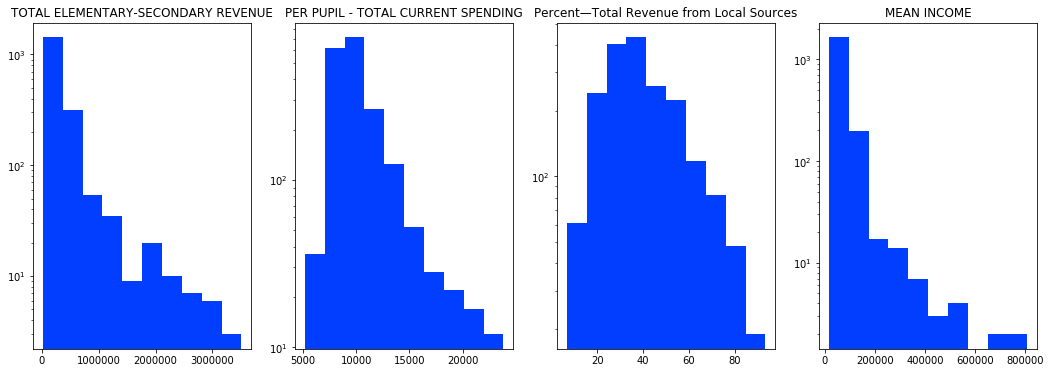

In [163]:
fig, axes = plt.subplots(ncols=4)
axes[0].hist(x=schlev_data['TOTALREV'], log=True)
axes[0].set_title('TOTAL ELEMENTARY-SECONDARY REVENUE')
axes[2].hist(x=schlev_data['PCTLTOT'], log=True)
axes[2].set_title('Percent—Total Revenue from Local Sources')
axes[1].hist(x=schlev_data['PPCSTOT'], log=True)
axes[1].set_title('PER PUPIL - TOTAL CURRENT SPENDING')
axes[3].hist(x=schlev_data['MEAN INCOME'], log=True)
axes[3].set_title('MEAN INCOME')
fig.set_size_inches(18, 6)

In [164]:
schlev_data.groupby('REGION').describe()['TOTALREV']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,534.0,222465.359551,113962.034091,72969.0,139804.75,187211.0,269659.5,729047.0
Northeast,79.0,316160.037975,195950.665691,104154.0,175117.00,234036.0,530353.5,747268.0
South,964.0,375519.004149,467622.447195,17710.0,116884.00,209618.5,434990.0,2791010.0
West,308.0,371876.675325,508518.028668,83398.0,150134.00,251111.0,396332.0,3508225.0


In [165]:
schlev_data.groupby('REGION').describe()['PPCSTOT']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,534.0,10949.945693,1837.752952,7374.0,9688.50,10578.5,11774.00,20363.0
Northeast,79.0,17811.037975,3293.213174,12352.0,14909.00,18151.0,20664.50,23830.0
South,964.0,9582.865145,2068.424627,7129.0,8363.00,8998.5,10055.50,22759.0
West,308.0,9234.100649,2123.282702,5195.0,7849.25,8736.5,10480.25,17046.0


In [166]:
schlev_data.groupby('REGION').describe()['PCTLTOT']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,534.0,40.683895,15.179495,8.2,29.450,37.50,50.100,82.0
Northeast,79.0,40.805063,27.139638,6.8,11.000,41.60,67.350,84.2
South,964.0,42.489730,15.638130,7.8,30.800,40.15,52.025,93.3
West,308.0,31.772078,15.569485,8.7,19.775,28.45,36.525,79.2


In [167]:
schlev_data.groupby('REGION').describe()['MEAN INCOME']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,534.0,64542.044944,27647.650873,23527.0,46384.25,58695.0,75746.75,157915.0
Northeast,79.0,62927.037975,24225.497727,22080.0,46018.00,56821.0,81651.50,114096.0
South,964.0,79053.336100,64939.159796,20840.0,54774.50,64812.5,78749.00,694980.0
West,308.0,77077.821429,65321.184047,17498.0,57701.00,69587.5,83685.50,808605.0


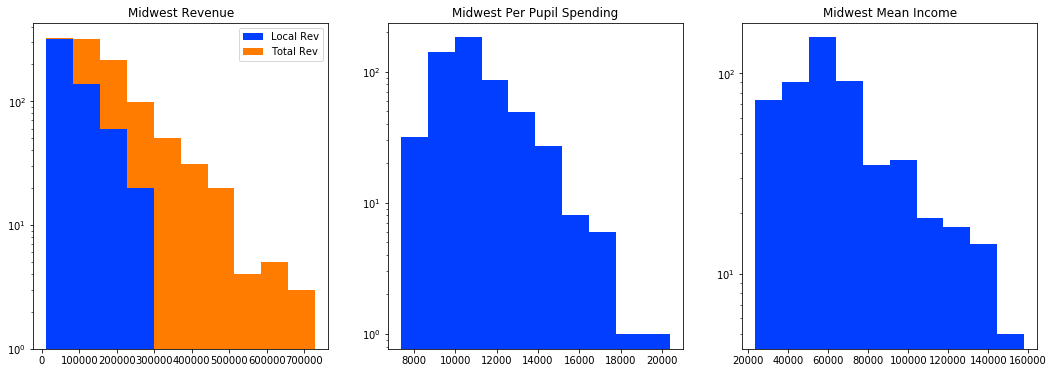

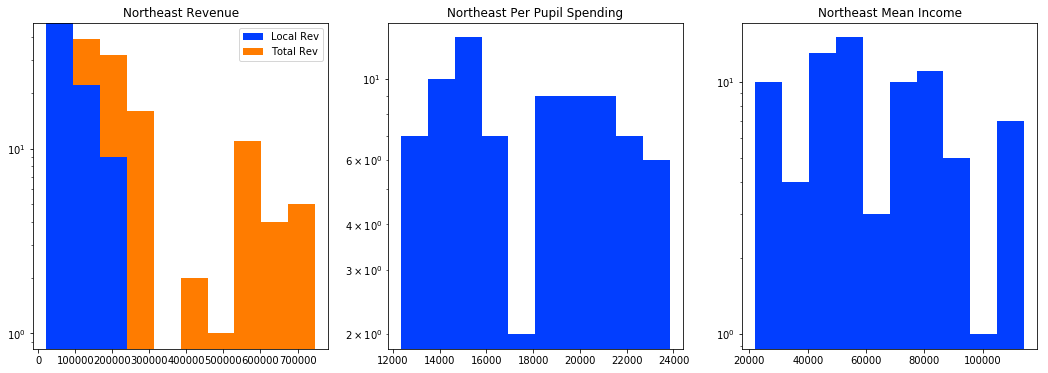

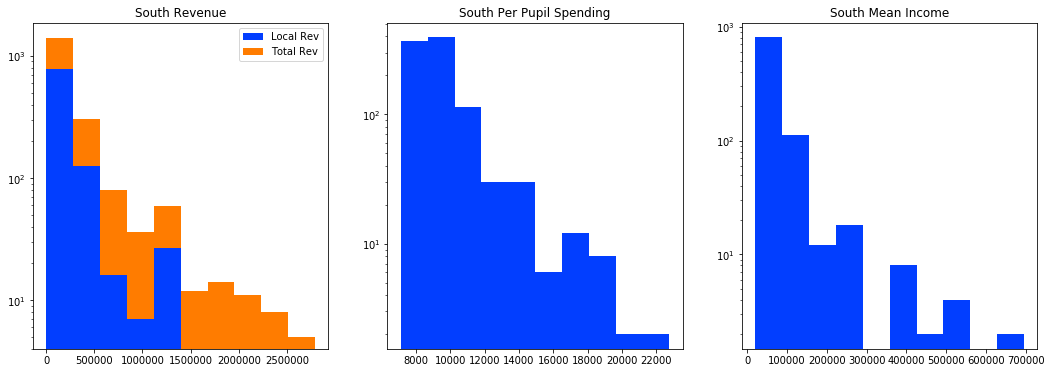

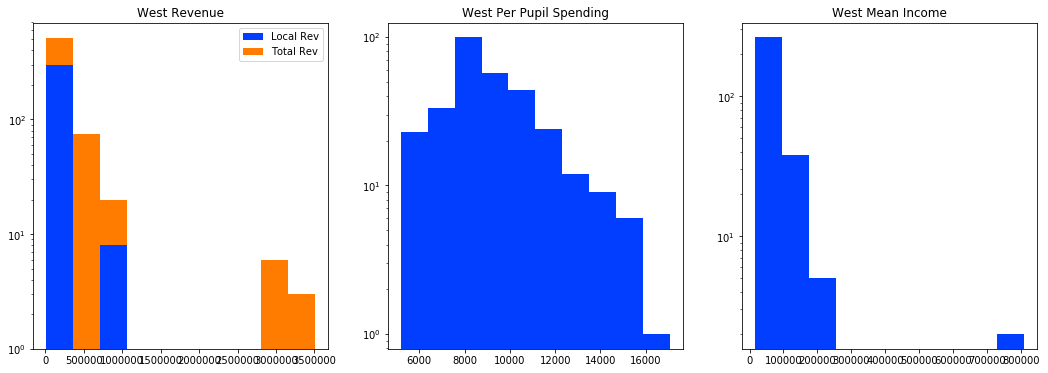

In [178]:
for name, group in schlev_data.groupby(['REGION']):
    fig, axes = plt.subplots(ncols=3)
    axes[0].hist(x=[group['TLOCREV'], group['TOTALREV']], log=True, stacked=True)
    axes[0].legend(['Local Rev', 'Total Rev'])
    axes[0].set_title(f'{name} Revenue')
    axes[1].hist(x=group['PPCSTOT'], log=True)
    axes[1].set_title(f'{name} Per Pupil Spending')
    axes[2].hist(x=group['MEAN INCOME'], log=True)
    axes[2].set_title(f'{name} Mean Income')
    fig.set_size_inches(18, 6)

In [169]:
schlev_data.groupby('DIVISION').describe()['TOTALREV']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,404.0,215450.188119,103054.612645,72969.0,138585.25,185528.5,264726.50,729047.0
East South Central,205.0,230204.839024,247401.381261,18078.0,99003.00,168443.0,273821.00,1373692.0
Middle Atlantic,79.0,316160.037975,195950.665691,104154.0,175117.00,234036.0,530353.50,747268.0
Mountain,81.0,609194.395062,913766.927865,83398.0,125797.00,275399.0,557620.00,3508225.0
Pacific,227.0,287195.022026,168281.279903,86163.0,155254.00,245162.0,368847.50,914050.0
South Atlantic,651.0,433934.605223,539183.555723,17710.0,112342.50,217965.0,528454.50,2791010.0
West North Central,130.0,244266.353846,140889.318983,75706.0,142398.25,195363.5,300496.75,676045.0
West South Central,108.0,299230.555556,134910.559289,142420.0,204447.50,244849.5,383579.50,625708.0


In [170]:
schlev_data.groupby('DIVISION').describe()['PCTLTOT']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,404.0,40.373267,15.805228,8.2,29.000,35.70,48.80,82.0
East South Central,205.0,38.254146,10.691794,18.0,29.000,37.00,47.40,59.5
Middle Atlantic,79.0,40.805063,27.139638,6.8,11.000,41.60,67.35,84.2
Mountain,81.0,28.634568,10.751688,8.7,20.300,28.60,34.00,53.7
Pacific,227.0,32.891630,16.839920,12.5,19.600,28.30,38.80,79.2
South Atlantic,651.0,43.903072,17.094531,7.8,31.550,40.60,54.15,93.3
West North Central,130.0,41.649231,13.053457,13.6,30.825,41.15,51.75,67.0
West South Central,108.0,42.010185,12.691398,21.4,32.375,42.15,49.05,87.5


In [171]:
schlev_data.groupby('DIVISION').describe()['PPCSTOT']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,404.0,11186.992574,1984.644722,7374.0,9790.25,10809.0,12229.00,20363.0
East South Central,205.0,9162.512195,997.403672,7129.0,8345.00,9042.0,9957.00,11411.0
Middle Atlantic,79.0,17811.037975,3293.213174,12352.0,14909.00,18151.0,20664.50,23830.0
Mountain,81.0,7563.049383,1369.741590,5195.0,6305.00,7504.0,8451.00,11341.0
Pacific,227.0,9830.378855,2025.355915,6930.0,8243.00,9345.0,10966.50,17046.0
South Atlantic,651.0,9558.204301,2313.225818,7418.0,8295.50,8809.0,9652.00,22759.0
West North Central,130.0,10213.276923,962.586793,7525.0,9574.50,10198.5,10809.75,12635.0
West South Central,108.0,10529.407407,1689.989537,8453.0,9571.75,10203.5,11015.50,20647.0


In [172]:
schlev_data.groupby('DIVISION').describe()['MEAN INCOME']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,404.0,63805.680693,27622.758869,23527.0,44513.50,57418.0,75738.25,151262.0
East South Central,205.0,72705.565854,38350.912659,20840.0,54280.00,66013.0,84848.00,287059.0
Middle Atlantic,79.0,62927.037975,24225.497727,22080.0,46018.00,56821.0,81651.50,114096.0
Mountain,81.0,87437.271605,116531.429543,19322.0,54414.00,69443.0,75539.00,808605.0
Pacific,227.0,73381.277533,30610.643465,17498.0,58229.00,69690.0,85741.50,194371.0
South Atlantic,651.0,83433.809524,75085.384170,24335.0,55097.00,65310.0,79276.00,694980.0
West North Central,130.0,66830.438462,27706.328583,23692.0,50227.75,62556.5,78221.00,157915.0
West South Central,108.0,64697.824074,22346.431822,25386.0,56172.25,61281.0,66819.50,168031.0


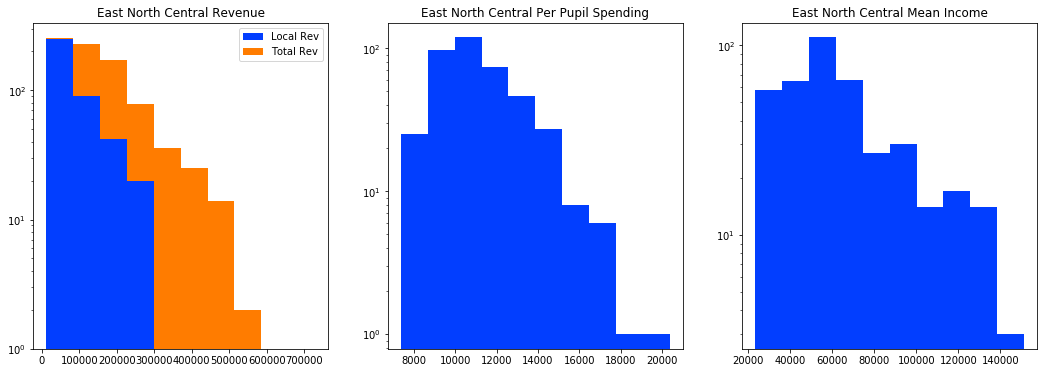

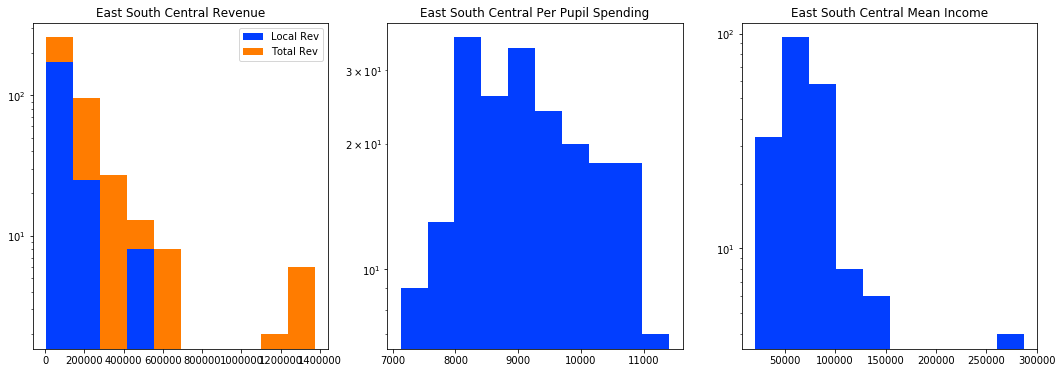

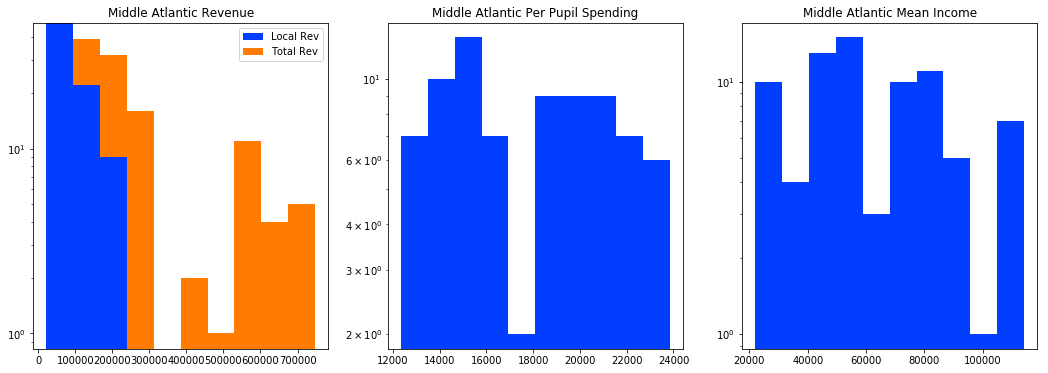

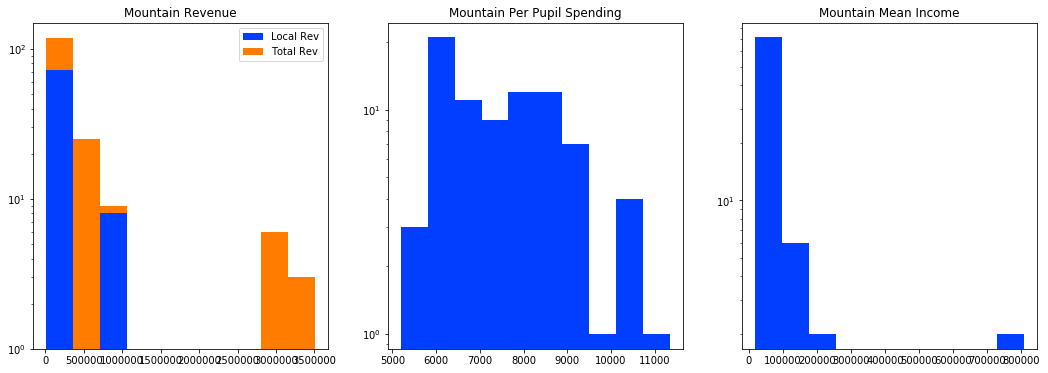

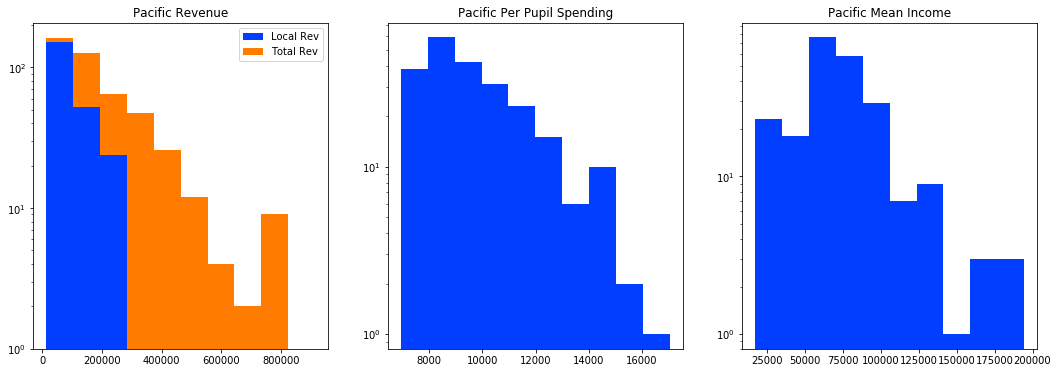

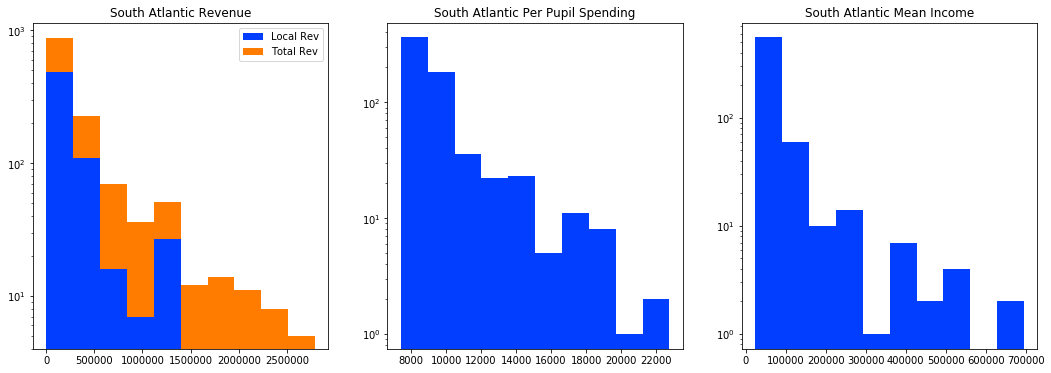

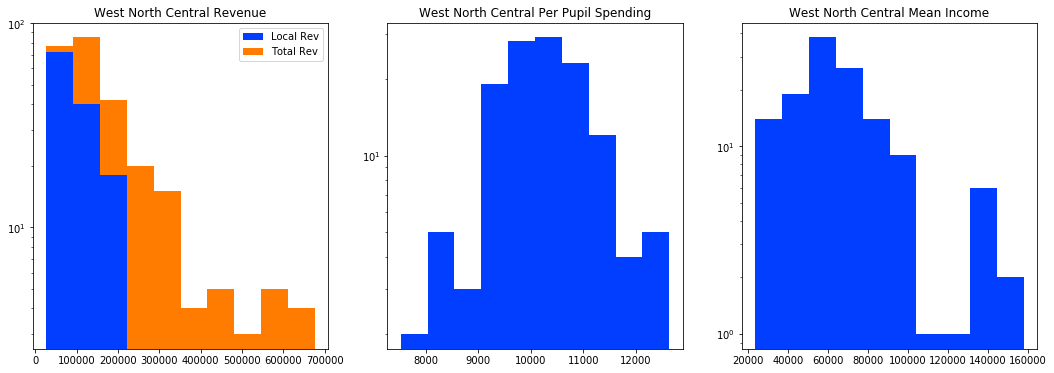

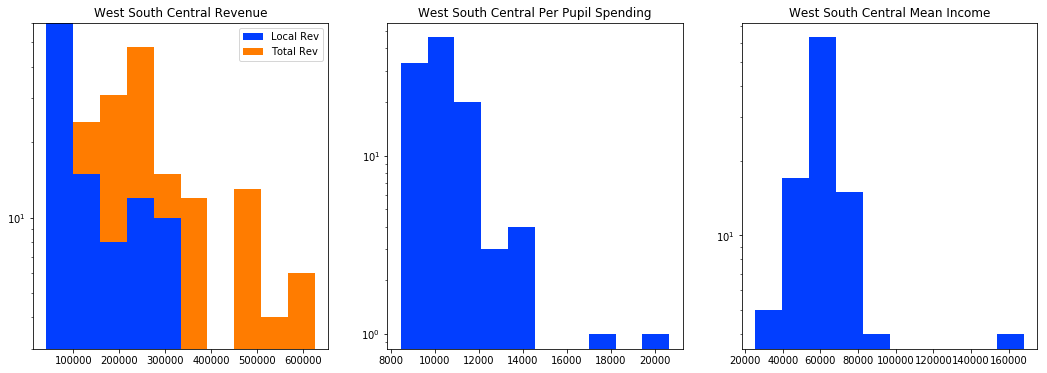

In [179]:
for name, group in schlev_data.groupby(['DIVISION']):
    fig, axes = plt.subplots(ncols=3)
    axes[0].hist(x=[group['TLOCREV'], group['TOTALREV']], log=True, stacked=True)
    axes[0].legend(['Local Rev', 'Total Rev'])
    axes[0].set_title(f'{name} Revenue')
    axes[1].hist(x=group['PPCSTOT'], log=True)
    axes[1].set_title(f'{name} Per Pupil Spending')
    axes[2].hist(x=group['MEAN INCOME'], log=True)
    axes[2].set_title(f'{name} Mean Income')
    fig.set_size_inches(18, 6)

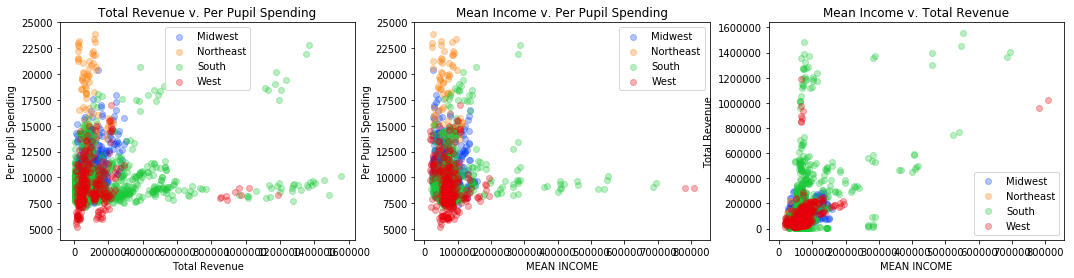

In [180]:
region_data = schlev_data.groupby(['REGION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in region_data:
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=name, alpha=0.3)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

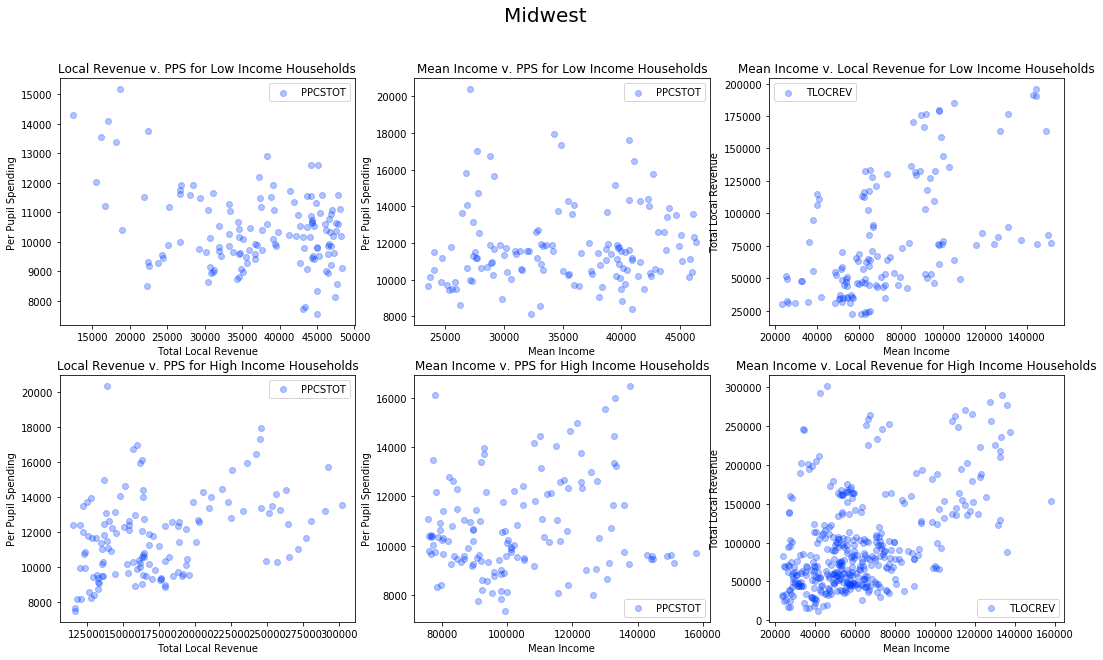

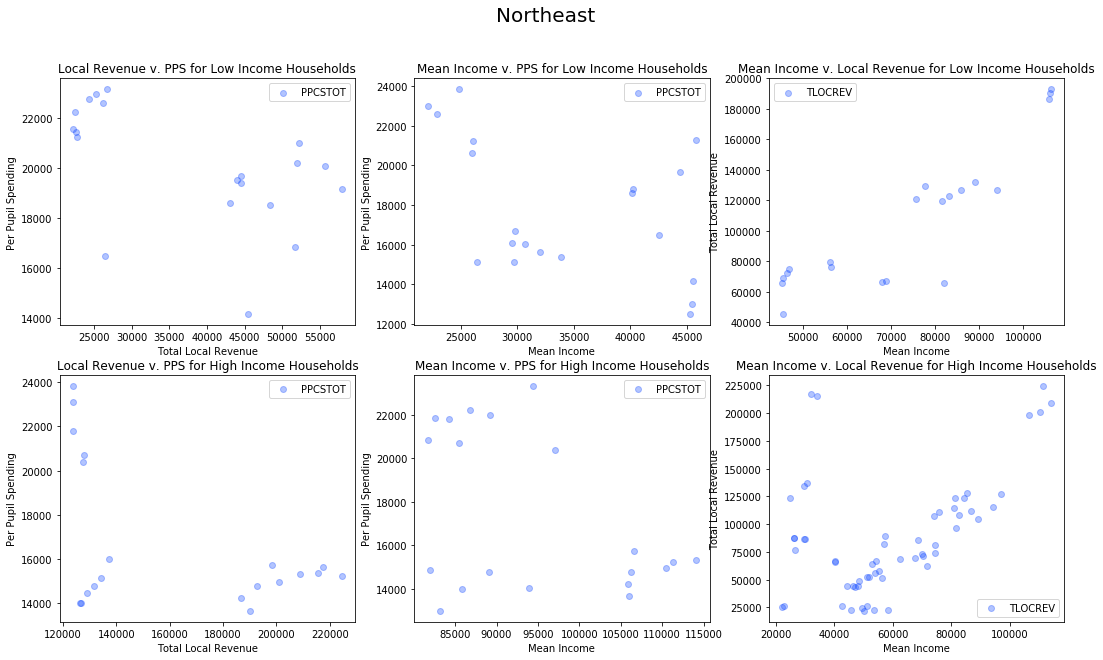

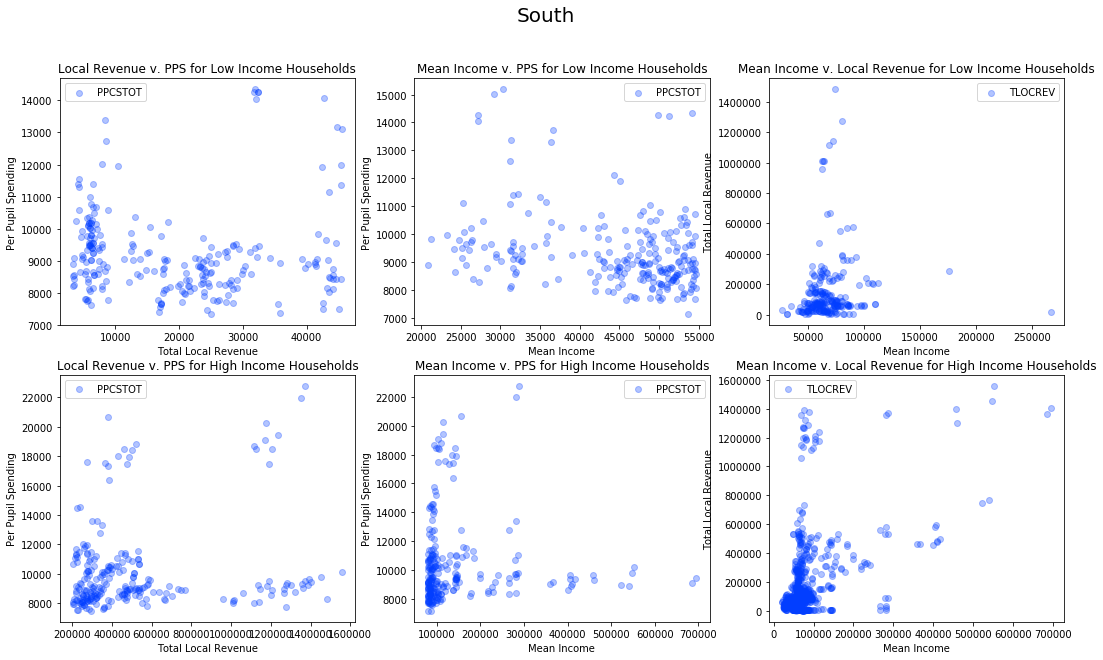

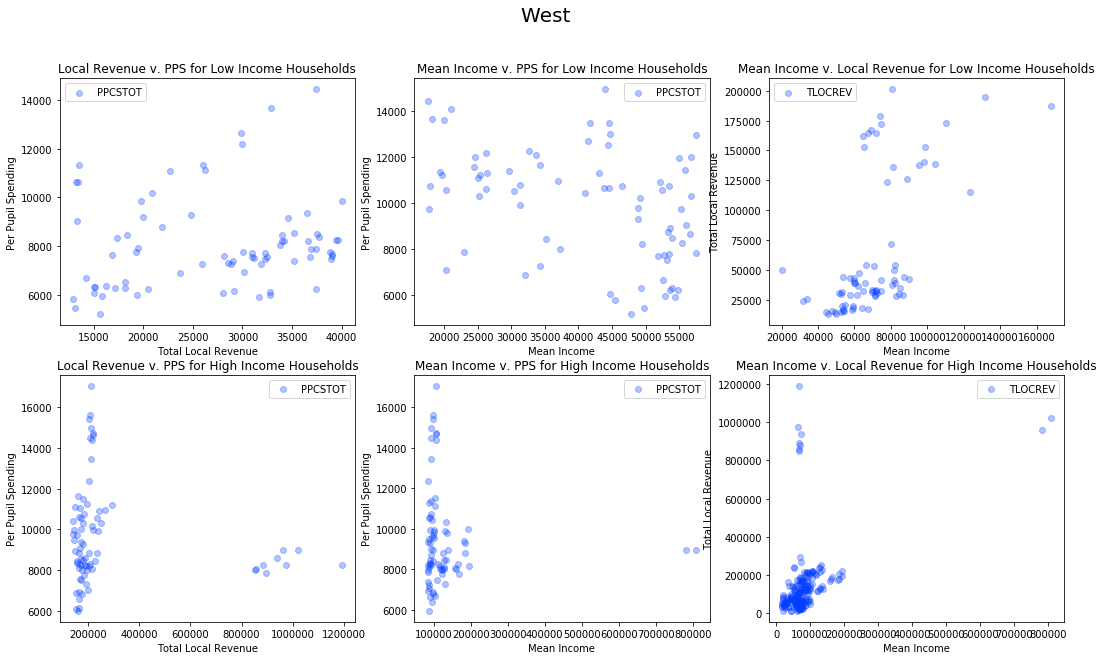

In [191]:
for name, group in region_data:
    low_income_qtl = group['MEAN INCOME'].quantile(q=.25)
    high_income_qtl = group['MEAN INCOME'].quantile(q=.75)
    low_rev_qtl = group['TLOCREV'].quantile(q=.25)
    high_rev_qtl = group['TLOCREV'].quantile(q=.75)
    low_pps_qtl = group['PPCSTOT'].quantile(q=.25)
    high_pps_qtl = group['PPCSTOT'].quantile(q=.75)

    low_income_grp = group[group['MEAN INCOME'] < low_income_qtl]
    high_income_grp = group[group['MEAN INCOME'] > high_income_qtl]
    low_rev_grp = group[group['TLOCREV'] < low_rev_qtl]
    high_rev_grp = group[group['TLOCREV'] > high_rev_qtl]
    low_pps_grp = group[group['PPCSTOT'] < low_pps_qtl]
    high_pps_grp = group[group['PPCSTOT'] > low_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PPCSTOT'], alpha=0.3)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_ylabel('Per Pupil Spending')
    axes[0][0].set_title('Local Revenue v. PPS for Low Income Households')
    axes[0][0].legend()

    axes[0][1].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PPCSTOT'], alpha=0.3)
    axes[0][1].set_xlabel('Mean Income')
    axes[0][1].set_ylabel('Per Pupil Spending')
    axes[0][1].set_title('Mean Income v. PPS for Low Income Households')
    axes[0][1].legend()

    axes[0][2].scatter(x=low_pps_grp['MEAN INCOME'], y=low_pps_grp['TLOCREV'], alpha=0.3)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_ylabel('Total Local Revenue')
    axes[0][2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[0][2].legend()
    
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PPCSTOT'], alpha=0.3)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_ylabel('Per Pupil Spending')
    axes[1][0].set_title('Local Revenue v. PPS for High Income Households')
    axes[1][0].legend()

    axes[1][1].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PPCSTOT'], alpha=0.3)
    axes[1][1].set_xlabel('Mean Income')
    axes[1][1].set_ylabel('Per Pupil Spending')
    axes[1][1].set_title('Mean Income v. PPS for High Income Households')
    axes[1][1].legend()

    axes[1][2].scatter(x=high_pps_grp['MEAN INCOME'], y=high_pps_grp['TLOCREV'], alpha=0.3)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_ylabel('Total Local Revenue')
    axes[1][2].set_title('Mean Income v. Local Revenue for High Income Households')
    axes[1][2].legend()

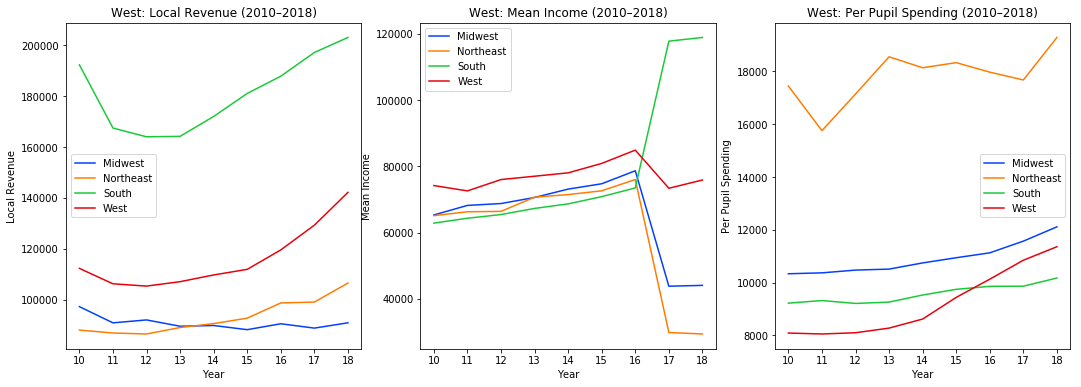

In [222]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)
region_data_by_year = schlev_data.groupby(['REGION', 'YRDATA']).mean()
for region in region_data_by_year.index.levels[0]:
    year_data = region_data_by_year.xs(region)

    axes[0].plot(year_data.index.values, year_data['TLOCREV'], label=region)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Local Revenue')
    axes[0].set_title(f'{region}: Local Revenue (2010–2018)')
    axes[0].legend()
    
    axes[1].plot(year_data.index.values, year_data['MEAN INCOME'], label=region)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Mean Income')
    axes[1].set_title(f'{region}: Mean Income (2010–2018)')
    axes[1].legend()
    
    axes[2].plot(year_data.index.values, year_data['PPCSTOT'], label=region)
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Per Pupil Spending')
    axes[2].set_title(f'{region}: Per Pupil Spending (2010–2018)')
    axes[2].legend()


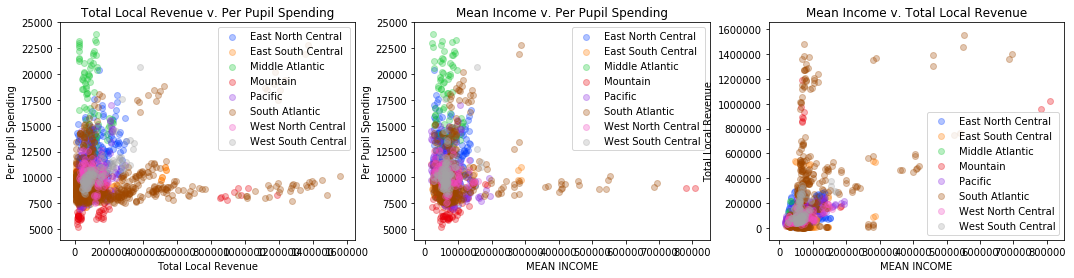

In [192]:
division_data = schlev_data.groupby(['DIVISION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in division_data:
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=name, alpha=0.3)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

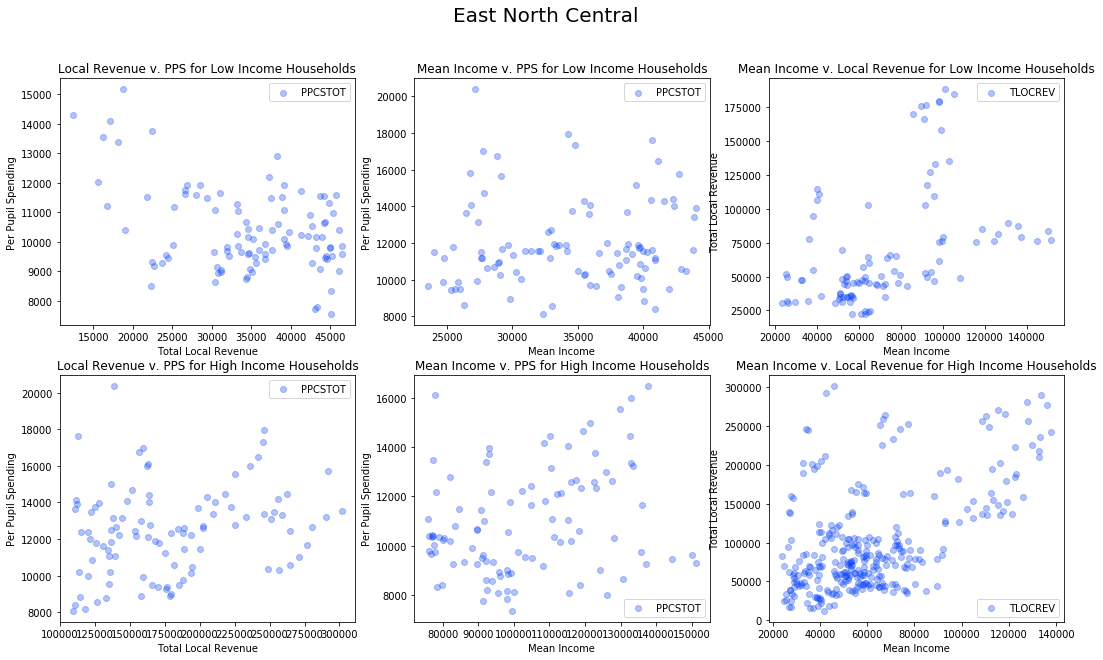

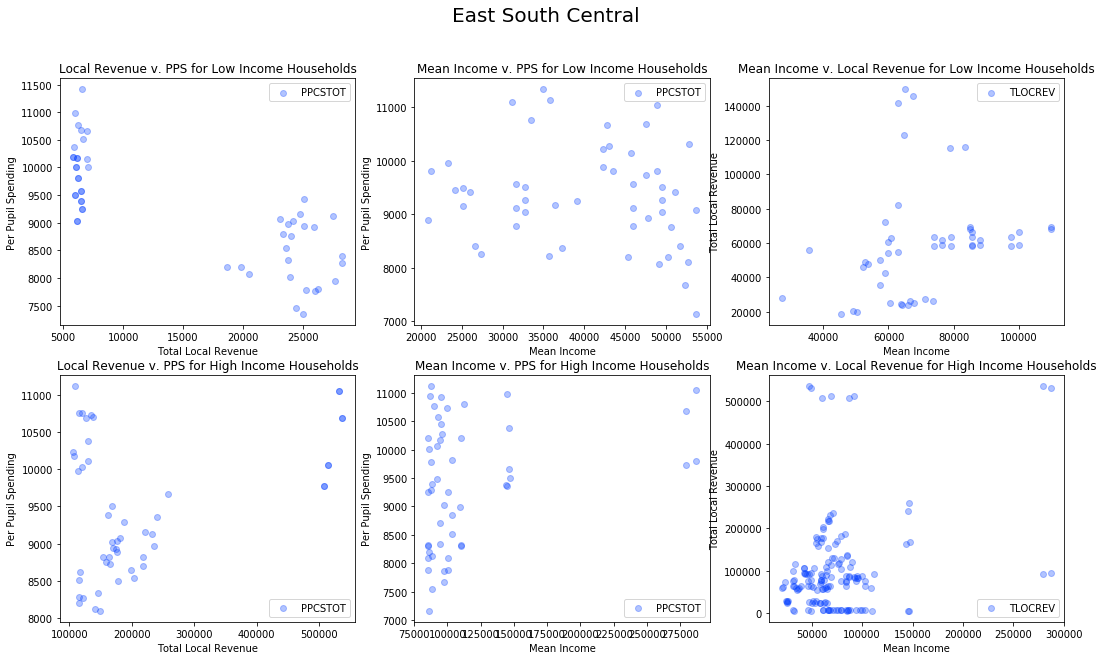

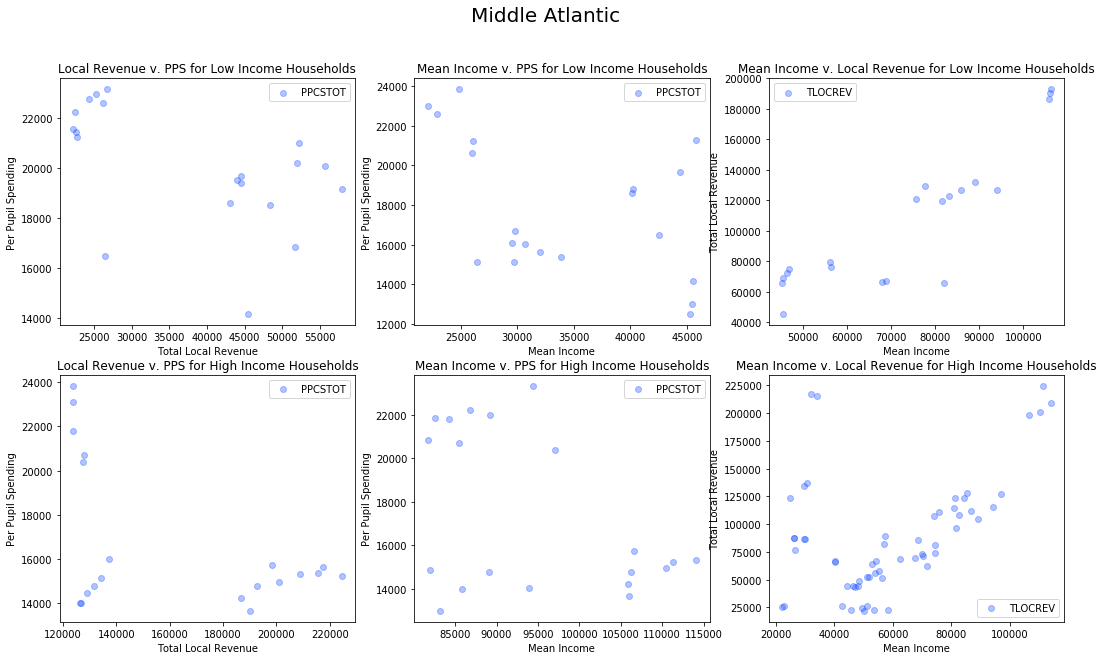

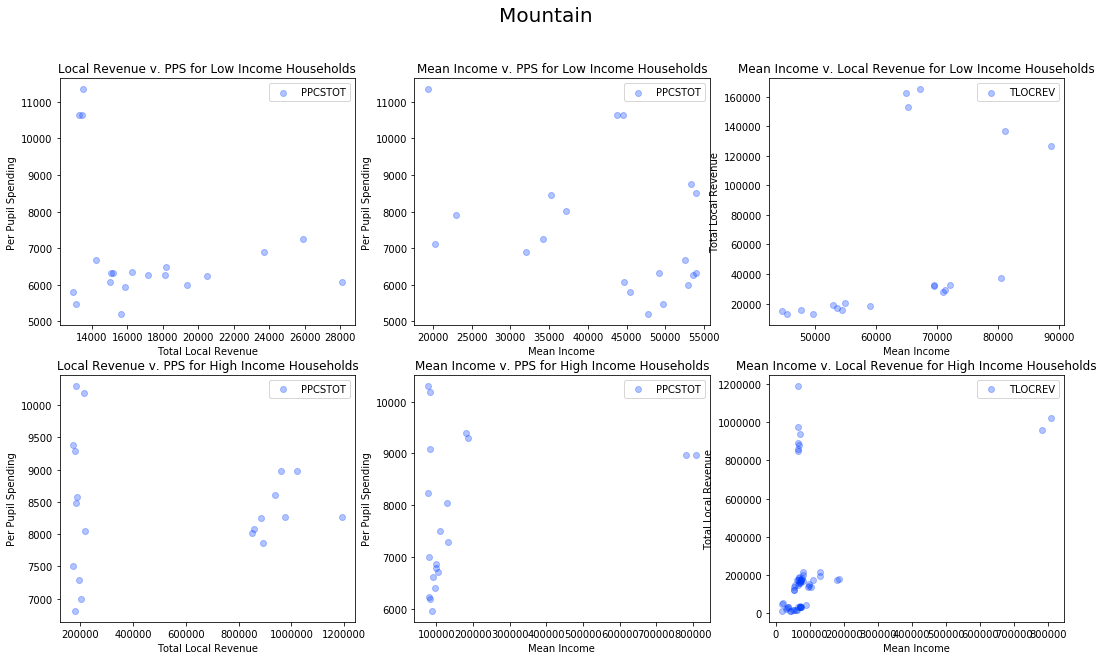

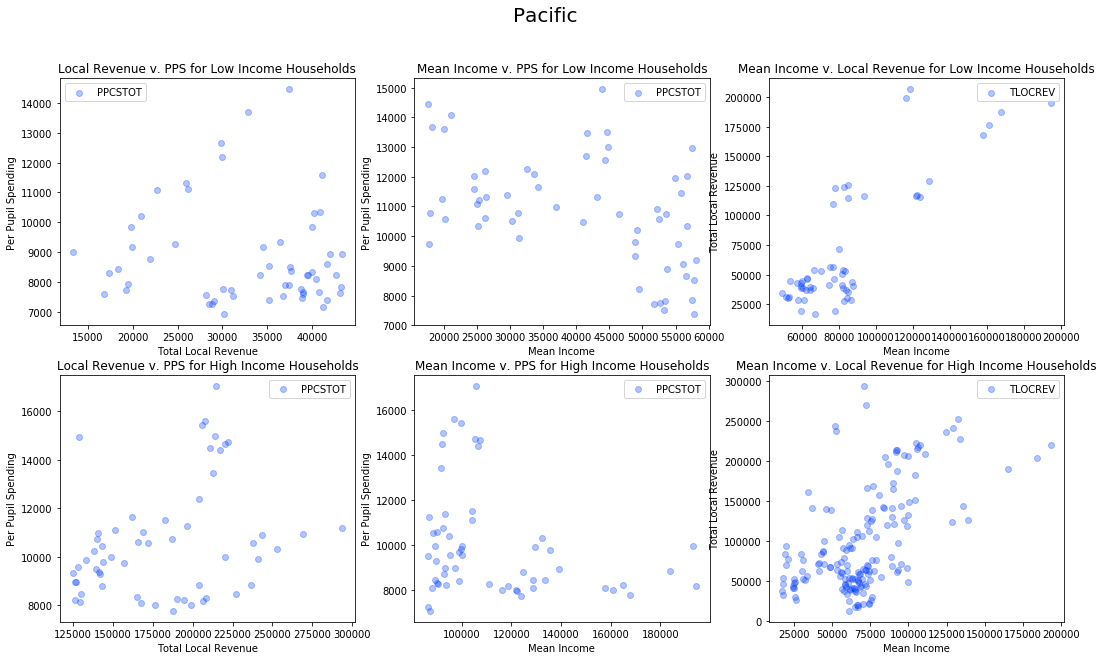

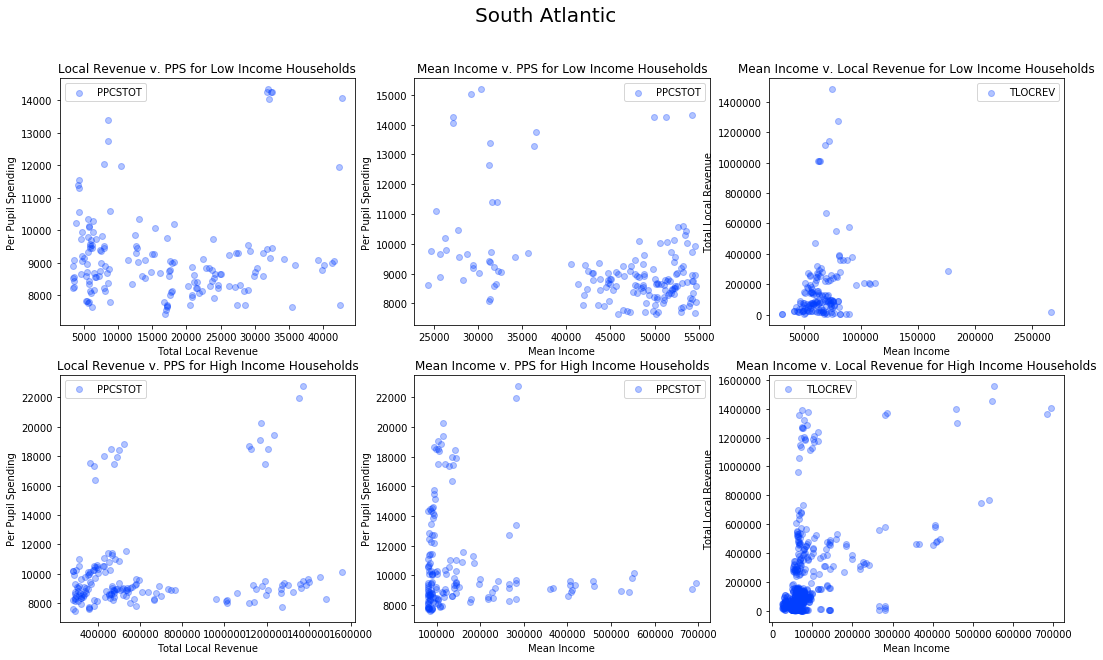

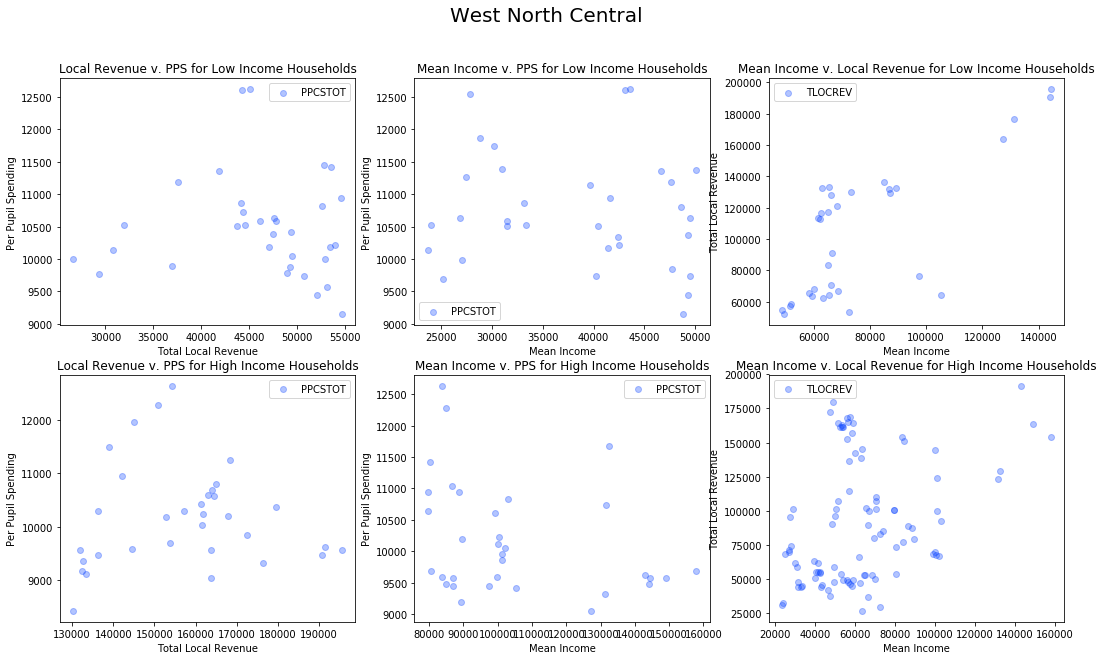

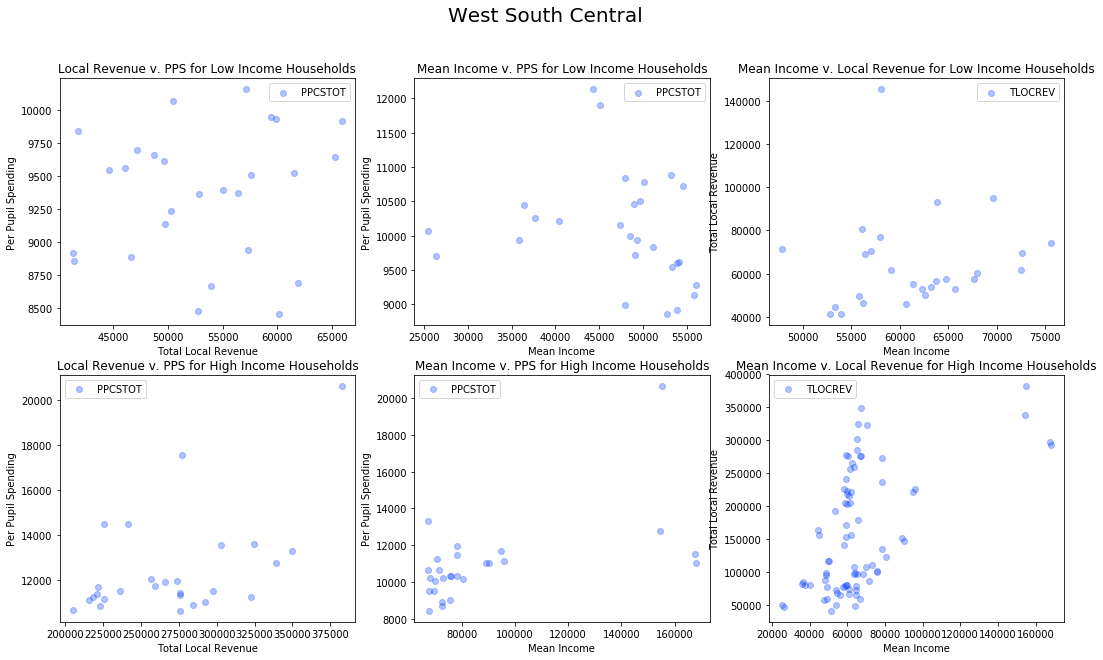

In [193]:
for name, group in division_data:
    low_income_qtl = group['MEAN INCOME'].quantile(q=.25)
    high_income_qtl = group['MEAN INCOME'].quantile(q=.75)
    low_rev_qtl = group['TLOCREV'].quantile(q=.25)
    high_rev_qtl = group['TLOCREV'].quantile(q=.75)
    low_pps_qtl = group['PPCSTOT'].quantile(q=.25)
    high_pps_qtl = group['PPCSTOT'].quantile(q=.75)

    low_income_grp = group[group['MEAN INCOME'] < low_income_qtl]
    high_income_grp = group[group['MEAN INCOME'] > high_income_qtl]
    low_rev_grp = group[group['TLOCREV'] < low_rev_qtl]
    high_rev_grp = group[group['TLOCREV'] > high_rev_qtl]
    low_pps_grp = group[group['PPCSTOT'] < low_pps_qtl]
    high_pps_grp = group[group['PPCSTOT'] > low_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PPCSTOT'], alpha=0.3)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_ylabel('Per Pupil Spending')
    axes[0][0].set_title('Local Revenue v. PPS for Low Income Households')
    axes[0][0].legend()

    axes[0][1].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PPCSTOT'], alpha=0.3)
    axes[0][1].set_xlabel('Mean Income')
    axes[0][1].set_ylabel('Per Pupil Spending')
    axes[0][1].set_title('Mean Income v. PPS for Low Income Households')
    axes[0][1].legend()

    axes[0][2].scatter(x=low_pps_grp['MEAN INCOME'], y=low_pps_grp['TLOCREV'], alpha=0.3)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_ylabel('Total Local Revenue')
    axes[0][2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[0][2].legend()
    
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PPCSTOT'], alpha=0.3)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_ylabel('Per Pupil Spending')
    axes[1][0].set_title('Local Revenue v. PPS for High Income Households')
    axes[1][0].legend()

    axes[1][1].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PPCSTOT'], alpha=0.3)
    axes[1][1].set_xlabel('Mean Income')
    axes[1][1].set_ylabel('Per Pupil Spending')
    axes[1][1].set_title('Mean Income v. PPS for High Income Households')
    axes[1][1].legend()

    axes[1][2].scatter(x=high_pps_grp['MEAN INCOME'], y=high_pps_grp['TLOCREV'], alpha=0.3)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_ylabel('Total Local Revenue')
    axes[1][2].set_title('Mean Income v. Local Revenue for High Income Households')
    axes[1][2].legend()

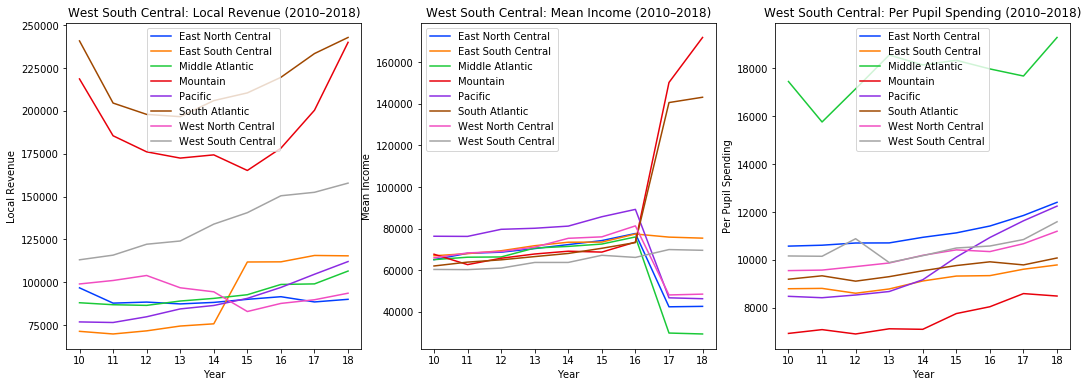

In [224]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)
division_data_by_year = schlev_data.groupby(['DIVISION', 'YRDATA']).mean()
for region in division_data_by_year.index.levels[0]:
    year_data = division_data_by_year.xs(region)

    axes[0].plot(year_data.index.values, year_data['TLOCREV'], label=region)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Local Revenue')
    axes[0].set_title(f'{region}: Local Revenue (2010–2018)')
    axes[0].legend()
    
    axes[1].plot(year_data.index.values, year_data['MEAN INCOME'], label=region)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Mean Income')
    axes[1].set_title(f'{region}: Mean Income (2010–2018)')
    axes[1].legend()
    
    axes[2].plot(year_data.index.values, year_data['PPCSTOT'], label=region)
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Per Pupil Spending')
    axes[2].set_title(f'{region}: Per Pupil Spending (2010–2018)')
    axes[2].legend()